# Iris Dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
iris = load_iris()
columns = iris.feature_names
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Visualize data distribution with two properties - sepal_length and sepal_width

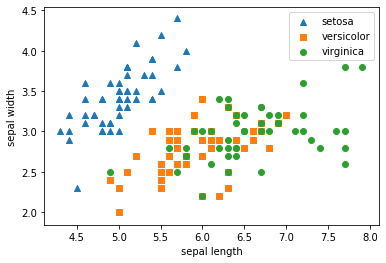

In [37]:
# setosa - triangle('^'), versicolor - square('s'), virginica - circle('o')
markers = ["^", "s", "o"]

# Setosa target value is 0, versicolor is 1, virginica is 2. 
# Create scatter plot with different shape for each target
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal length (cm)']
    y_axis_data = irisDF[irisDF['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend() # for label
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### Transform the original data to a normal distribution with mean 0 and variance 1

In [46]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [47]:
iris_scaled.shape

(150, 4)

### Perform PCA conversion

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [54]:
# Name the column names of PCA converted data as pca_component_1 and pca_component_2
columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


### Visualize the data spread with features reduced dimensions with PCA

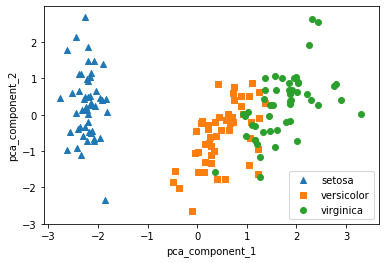

In [56]:
# setosa - triangle('^'), versicolor - square('s'), virginica - circle('o')
markers = ["^", "s", "o"]

# Perform a scatter plot of pca_component_1 on the x-axis and pc_component_2 on the y-axis.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])
    
plt.legend() # for label
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

### Volatility ratio for each PCA component

In [57]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


### Comparison of prediction performance between original data and PCA transformed data

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = 'accuracy', cv= 3)

print(scores)
print(np.mean(scores))

[0.98039216 0.92156863 0.97916667]
0.960375816993464


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [76]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores2 = cross_val_score(rcf, pca_X, iris.target, scoring = 'accuracy', cv= 3)
print(scores2)
print(np.mean(scores2))

[0.8627451  0.84313725 0.89583333]
0.8672385620915034


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Credit Card Dataset

In [96]:
df = pd.read_excel('/Users/sunheepark/Downloads/default of credit card clients.xls',
                  sheet_name = 'Data', header = 1)

In [97]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [98]:
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month': 'default'}, inplace = True)

In [100]:
y = df['default']
X = df.drop(['ID', 'default'], axis = 1)

In [103]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

### Visualize the correlation between features

In [105]:
import seaborn as sns

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


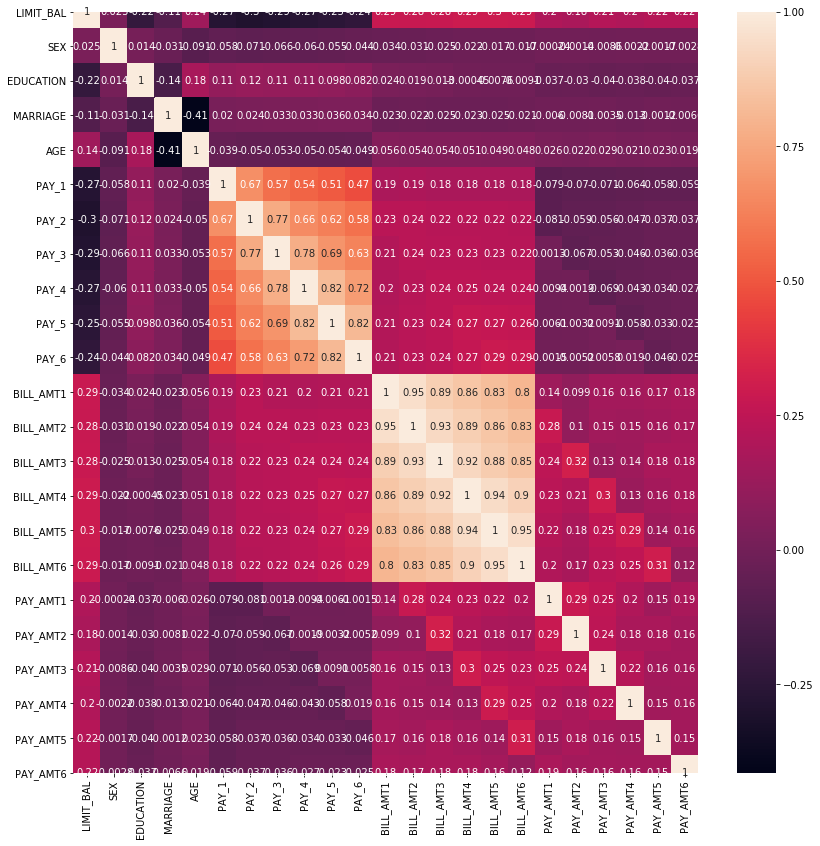

In [115]:
corr = X.corr()
plt.figure(figsize = (14,14))
sns.heatmap(corr, annot = True)

### Variability check after PCA conversion of features with high correlation

In [125]:
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('Target attribute name:', cols_bill)

Target attribute name: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


In [130]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)

print('Volatility of each PCA Component:', pca.explained_variance_ratio_)

Volatility of each PCA Component: [0.90555253 0.0509867 ]


### Comparing classification prediction performance between original data set and PCA transformed data set with 6 components

In [133]:
rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X, y, scoring = 'accuracy', cv= 3)

In [135]:
print('Accuracy of each fold set when CV=3:', scores)
print('Average accuracy:{0: .4f}'.format(np.mean(scores)))

Accuracy of each fold set when CV=3: [0.8083 0.8196 0.8232]
Average accuracy: 0.8170


In [144]:
# Apply StandardScaler to the original dataset first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [146]:
# Perform PCA transformation with 6 components and perform classification prediction with cross_val_score( ).
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y, scoring = 'accuracy', cv = 3)

print('Accuracy of PCA-converted each fold set when CV=3:', scores_pca)
print('Average accuracy of PCA conversion data set:{0:.4f}'.format(np.mean(scores_pca)))

Accuracy of PCA-converted each fold set when CV=3: [0.7927 0.7966 0.8023]
Average accuracy of PCA conversion data set:0.7972
